In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import model_selection
from xgboost import XGBClassifier
import datetime
import time
from boostaroota import BoostARoota
from scipy.ndimage.interpolation import shift

In [61]:
# path of CSV files
path = 'data/'
year_month_list = ['2009-09', '2009-10', '2009-11', '2009-12', '2010-01',
                   '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', 
                   '2011-09', '2011-10', '2011-11', '2011-12', '2012-01',
                   '2012-09', '2012-10', '2012-11', '2012-12', '2013-09',
                   '2013-10', '2013-11', '2013-12', '2014-09', '2014-10', 
                   '2014-11', '2014-12', '2015-09', '2015-10', '2015-11', 
                   '2015-12', '2016-01', '2016-09', '2016-10', '2016-11',
                   '2016-12', '2017-01', '2017-09', '2017-10', '2017-11',
                   '2017-12', '2018-09', '2018-10', '2018-11', '2018-12']

In [62]:
# reading CSV files into dataframes
df_list = []
for ym in year_month_list:
    df_list.append(pd.read_csv(path+ym+'.csv'))

C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (42,166,167,174,175,178,179,182,183,188,189,190,191,198,199,203,204,205,207,209,211,226,227,231,232,233) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (42,166,167,178,179,182,183,188,189,190,191,203,204,205,231,232,233,238,240,241) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (166,167,174,175,188,189,190,191,203,204,205,226,227,231,232,233,238,240,241) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\User

C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (42,166,167,174,175,182,183,188,189,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (166,167,174,175,190,191) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (166,167,178,179,182,183,188,189,190,191,198,199,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (42,166,167,188,189,203,204,205,226,22

In [81]:
# concatenating dataframes
df = pd.concat(df_list)

In [82]:
df.reset_index(inplace=True, drop=True)

In [89]:
df.drop('game_year_month', axis=1, inplace=True)

In [83]:
# Displaying feature names
list(df)

['play_id',
 'game_id',
 'home_team',
 'away_team',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'no_sc

In [6]:
# Showing all columns
pd.options.display.max_columns = None
# Displaying sample rows
df.sample(n=4).head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

In [7]:
print ("Number of games:")
print (len(df['game_id'].unique()))
print ("Number of plays:")
print (len(df))
print ("Number of plays resulting in an interception:")
print (df['interception'].value_counts()[1])
print ("General interception percentage:")
print (df['interception'].value_counts()[1]/len(df))

Number of games:
2526
Number of plays:
449371
Number of plays resulting in an interception:
4630
General interception percentage:
0.010303290599526895


In [8]:
# Types of play
df['play_type'].value_counts()

pass           186677
run            132692
no_play         42431
kickoff         25552
punt            23914
extra_point     10934
field_goal       9777
qb_kneel         3830
qb_spike          690
Name: play_type, dtype: int64

In [9]:
# Types of play that resulted in an interception
df[df['interception'] == True]['play_type'].value_counts()

pass       4351
no_play     279
Name: play_type, dtype: int64

In [10]:
# Exploring interceptions from "no play" type
df[(df['interception'] == True) & (df['play_type'] == 'no_play')]

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackl

In [11]:
# They appear to be interceptions that were called back due to penalty
df[(df['interception'] == True) & (df['play_type'] == 'no_play')]['penalty'].value_counts()

1.0    279
Name: penalty, dtype: int64

In [12]:
# pass_attempt seems like a better value to focus on when subsetting
df[(df['interception'] == True)]['pass_attempt'].value_counts()

1.0    4630
Name: pass_attempt, dtype: int64

In [13]:
# Number os sacks
sum(df['sack']==1)

11786

In [14]:
# Following the reasoning of the benchmark study, we remove sacks
# By keeping only rows where 'sack' = 0, we conveniently remove those where 'sack' is null
# Those are events that are not actual plays by the teams (such as the end of a quarter)
df = df[df['sack']==0]

## Handling null values

In [16]:
# We will create lagged variables before filtering for pass attempts
# Before creating the lagged features, however, we must deal with null values in the original ones
# Features to lag
lag_feats = ['play_type', 'complete_pass', 'incomplete_pass', 'yards_gained', 'pass_location']

In [17]:
# Checking for columns with null values
null_cols = df.columns[df.isnull().sum() > 0]

In [18]:
# Checking for null values in variables to lag
null_feats = null_cols[null_cols.isin(lag_feats)]

In [19]:
null_feats

Index(['yards_gained', 'pass_location'], dtype='object')

In [20]:
# Increasing column width so we can read entire descriptions
pd.options.display.max_colwidth = 1000

In [21]:
# Cell commented out for readability
# df.loc[df['yards_gained'].isnull(), 'desc']

In [22]:
len(df.loc[df['yards_gained'].isnull(), 'desc'])

203

In [23]:
# The case of null yards_gained is strange and rare
df.loc[df['yards_gained'].isnull()]['game_id'].unique()
# Only two games have this issue, which appears to be a bug

array([2013112401, 2013120101], dtype=int64)

In [24]:
# Since imputing reasonable values would be complex, and the occurrences are rare,
# we will remove those cases
df = df.loc[-df['yards_gained'].isnull(), :]

In [25]:
# Cell commented out for readability
# df[df['pass_location'].isnull()]['desc']

In [26]:
# Most aren't pass attempts
df[df['pass_location'].isnull()]['pass_attempt'].value_counts()

0.0    248121
1.0      1766
Name: pass_attempt, dtype: int64

In [27]:
# Creating a category 'none' for when there was no pass attempt and therefore pass_location isn't applicable
df.loc[(df['pass_location'].isnull()) & (df['pass_attempt'] == 0), 'pass_location'] = 'none'

In [28]:
# We will impute to the others a pass location proportional to the overall prevalence
# It will represent the expected play selection of the QB prior to the play starting
np.random.seed(42)
def impute_proportional(df, col, cond):
    value_counts = df[col].value_counts()
    categories = value_counts.index
    probs = value_counts.values / value_counts.values.sum()
    p_list = np.random.choice(categories, len(df[cond]), p=probs)
    df.loc[cond, col] = p_list
    return df

In [29]:
# Cell commented out for readability
# df[(df['pass_location'].isnull()) & (df['sack'] == 0)]['desc']

In [30]:
print (len(df[(df['pass_location'].isnull()) & (df['sack'] == 0)]))
print (df[(df['pass_location'].isnull()) & (df['sack'] == 0)]['qb_spike'].sum())
print (df[(df['pass_location'].isnull()) & (df['sack'] == 0)]['two_point_attempt'].sum())

1766
692
519.0


In [31]:
# We should remove QB spikes as they are not actually a pass attempt
df = df[df['qb_spike'] == 0]

In [32]:
df[df['two_point_attempt'] == 1]['interception'].value_counts()

0.0    696
Name: interception, dtype: int64

In [33]:
# Even though some two-point attempt passes have been intercepted, they aren't tagged as such
# We exclude two-point attempts as they are extraodrinary plays and not a regular passing situation
df = df[df['two_point_attempt'] == 0]

In [34]:
# Other cases
# Cell commented out for readability
# df[(df['pass_location'].isnull()) & (df['sack'] == 0)]['desc']

In [35]:
# Impute proportional value for the rest
cond = (df['pass_location'].isnull()) & (df['sack'] == 0)
df = impute_proportional(df, 'pass_location', cond)

## Creating lagged features

In [36]:
# Now we can create our lagged features
def add_lag(df, feature):
    return pd.concat([df,df[feature].shift().rename('last_'+feature)], axis=1)

In [37]:
# Creating lagged variables
for feat in lag_feats:
    df = add_lag(df, feat)
    print ("Created lag for %s" % (feat))

Created lag for play_type
Created lag for complete_pass
Created lag for incomplete_pass
Created lag for yards_gained
Created lag for pass_location


In [38]:
# Checking lagged variables
df.iloc[500:].head(10)[lag_feats+['last_'+l for l in lag_feats]]

,play_type,complete_pass,incomplete_pass,yards_gained,pass_location,last_play_type,last_complete_pass,last_incomplete_pass,last_yards_gained,last_pass_location
533,run,0.0,0.0,-1.0,none,kickoff,0.0,0.0,0.0,none
534,pass,1.0,0.0,7.0,right,run,0.0,0.0,-1.0,none
535,run,0.0,0.0,7.0,none,pass,1.0,0.0,7.0,right
536,pass,1.0,0.0,13.0,left,run,0.0,0.0,7.0,none
537,run,0.0,0.0,12.0,none,pass,1.0,0.0,13.0,left
539,run,0.0,0.0,2.0,none,run,0.0,0.0,12.0,none
540,no_play,0.0,0.0,0.0,none,run,0.0,0.0,2.0,none
541,run,0.0,0.0,0.0,none,no_play,0.0,0.0,0.0,none
542,field_goal,0.0,0.0,0.0,none,run,0.0,0.0,0.0,none
543,kickoff,0.0,0.0,0.0,none,field_goal,0.0,0.0,0.0,none


## Filtering for pass attempts

In [39]:
# We can now filter for pass attempts before dealing with null values for other features

In [40]:
# Filtering for pass attempts
df = df[df['pass_attempt'] == True]

In [41]:
print ("When considering only pass attempts")
print ("Number of plays:")
print (len(df))
print ("Number of plays resulting in an interception:")
print (df['interception'].value_counts()[1])
print ("General interception percentage:")
print (df['interception'].value_counts()[1]/len(df))

When considering only pass attempts
Number of plays:
175176
Number of plays resulting in an interception:
4630
General interception percentage:
0.026430561264100105


# Visualization

In [103]:
def bin_plot(x, y, data, bins, hue=None, name_x=None, name_y=None):
    if not name_x:
        name_x = x + '_bin'
    if not name_y:
        name_y = y
    data = data[~pd.isnull(data[x])]
    max_ = data[x].max()
    min_ = data[x].min()
    range_ = max_ - min_
    n_bounds = bins + 1
    bounds = np.append(np.arange(min_,max_,range_/n_bounds), max_)
    data[name_x] = 0.0

    labels = []
    for i in range(0,len(bounds)-1):
        mask = (data[x] >= bounds[i]) & (data[x] < bounds[i+1])
        label = str(round(bounds[i],1))+'-'+str(round(bounds[i+1],1))
        data.loc[mask, name_x] = label
        labels.append(label)
        
    fig, ax = plt.subplots()
    if hue:
        means = data[[name_x,hue, y]].groupby([name_x,hue]).mean().reset_index()
        ax = sns.pointplot(x=name_x, y=y, hue=hue, data=means)
    else:
        means = data[[name_x, y]].groupby(name_x).mean().reset_index()
        ax = sns.pointplot(x=name_x, y=y, data=means)
    ax.set_xticklabels(data[name_x].unique(), rotation=30)
    ax.set_ylabel(name_y)
    plt.show()

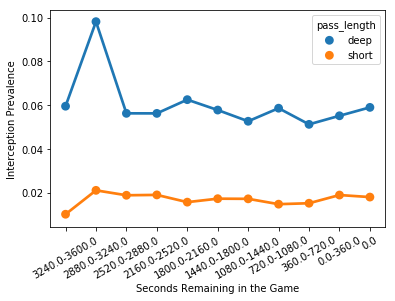

In [104]:
pd.options.mode.chained_assignment = None
bin_plot('game_seconds_remaining', 'interception', df, 9, hue='pass_length',
         name_x='Seconds Remaining in the Game', name_y='Interception Prevalence')

## Handling null values for other features

In [41]:
# Selecting features that appear to have a chance of being explanatory of interception probability
features = ['yardline_100','game_date','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining', \
            'game_half','drive','qtr','down','goal_to_go','ydstogo','ydsnet','shotgun','no_huddle', \
            'pass_length','pass_location','posteam_timeouts_remaining','defteam_timeouts_remaining', \
            'posteam_score','defteam_score','score_differential','last_play_type', \
            'last_complete_pass','last_incomplete_pass','last_yards_gained','last_pass_location', \
             'interception']

In [42]:
# Checking for columns with null values
null_cols = df.columns[df.isnull().sum() > 0]

In [43]:
# Selecting columns included as features that have null values
null_feats = null_cols[null_cols.isin(features)]

In [44]:
null_feats

Index(['half_seconds_remaining', 'game_seconds_remaining', 'pass_length'], dtype='object')

In [45]:
# Cell commented out for readability
# df[df['half_seconds_remaining'].isnull()]['desc']

In [46]:
# All have 100 seconds remaining. Possible bug in parsing the description.
df.loc[df['half_seconds_remaining'].isnull(), 'half_seconds_remaining'] = 100.0

In [47]:
# Cell commented out for readability
# df[df['game_seconds_remaining'].isnull()]['desc']

In [48]:
# Again no reasonable explanation. All have double zeroes. From 'time' we can derive the seconds remaining
df.loc[[411853, 415579, 417934, 423353, 428227], 'game_seconds_remaining'] = 100
df.loc[[418632], 'game_seconds_remaining'] = 200
df.loc[[425316, 429550], 'game_seconds_remaining'] = 300

## Selecting and building features

In [49]:
df = df[features]

In [50]:
df.loc[:, 'game_date'] = df['game_date'].apply(lambda x: x[5:7])

In [51]:
# Dataframe before encoding categorical variables
df.sample(n=5)

,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,drive,qtr,down,goal_to_go,ydstogo,ydsnet,shotgun,no_huddle,pass_length,pass_location,posteam_timeouts_remaining,defteam_timeouts_remaining,posteam_score,defteam_score,score_differential,last_play_type,last_complete_pass,last_incomplete_pass,last_yards_gained,last_pass_location,interception
173382,4.0,12,324.0,324.0,324.0,Half2,25,4,4.0,0.0,2,83,1,0,short,left,3.0,2.0,10.0,23.0,-13.0,pass,1.0,0.0,5.0,middle,1.0
284472,49.0,10,868.0,868.0,868.0,Half2,16,4,4.0,0.0,5,51,1,0,deep,middle,3.0,2.0,7.0,23.0,-16.0,no_play,0.0,0.0,0.0,none,0.0
263194,34.0,12,622.0,1522.0,3322.0,Half1,2,1,2.0,0.0,8,31,1,0,short,left,3.0,3.0,0.0,6.0,-6.0,run,0.0,0.0,2.0,none,0.0
442066,36.0,12,600.0,600.0,600.0,Half2,16,4,3.0,0.0,5,58,1,0,deep,left,2.0,3.0,7.0,25.0,-18.0,pass,1.0,0.0,5.0,right,0.0
199289,78.0,10,269.0,1169.0,1169.0,Half2,15,3,1.0,0.0,10,3,0,0,short,right,3.0,2.0,20.0,17.0,3.0,punt,0.0,0.0,0.0,none,0.0


In [52]:
# One-hot encoding
def one_hot(df, groups):
    dummy_df = pd.get_dummies(df[groups])
    df = pd.concat([df, dummy_df], axis=1).drop(groups, axis=1)
    return df

In [53]:
# 'goal_to_go', 'shotgun', 'no_huddle', 'last_complete_pass' and 'last_incomplete_pass' are already binary
groups = ['game_date', 'game_half', 'qtr', 'down', 'pass_length', \
          'pass_location', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', \
         'last_play_type', 'last_pass_location']

In [54]:
for col in groups:
    df.loc[:, col] = df[col].astype('category')

In [55]:
df = one_hot(df, groups)

In [56]:
df.sample(n=5)

,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,drive,goal_to_go,ydstogo,ydsnet,shotgun,no_huddle,posteam_score,defteam_score,score_differential,last_complete_pass,last_incomplete_pass,last_yards_gained,interception,game_date_01,game_date_09,game_date_10,game_date_11,game_date_12,game_half_Half1,game_half_Half2,game_half_Overtime,qtr_1,qtr_2,qtr_3,qtr_4,qtr_5,down_1.0,down_2.0,down_3.0,down_4.0,pass_length_deep,pass_length_short,pass_location_left,pass_location_middle,pass_location_none,pass_location_right,posteam_timeouts_remaining_0.0,posteam_timeouts_remaining_1.0,posteam_timeouts_remaining_2.0,posteam_timeouts_remaining_3.0,defteam_timeouts_remaining_0.0,defteam_timeouts_remaining_1.0,defteam_timeouts_remaining_2.0,defteam_timeouts_remaining_3.0,last_play_type_field_goal,last_play_type_kickoff,last_play_type_no_play,last_play_type_pass,last_play_type_punt,last_play_type_qb_kneel,last_play_type_run,last_pass_location_left,last_pass_location_middle,last_pass_location_none,last_pass_location_right
257187,62.0,104.0,1004.0,2804.0,6,0.0,10,6,0,0,0.0,3.0,-3.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
378288,75.0,614.0,1514.0,3314.0,2,0.0,10,12,1,0,0.0,3.0,-3.0,0.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
178846,36.0,569.0,1469.0,3269.0,3,0.0,10,16,0,0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
105882,41.0,108.0,108.0,108.0,25,0.0,10,61,1,0,16.0,23.0,-7.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
146837,58.0,87.0,87.0,1887.0,10,0.0,10,22,0,0,3.0,3.0,0.0,1.0,0.0,11.0,0.0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


## Scaling features

In [57]:
scaler = StandardScaler()
num_feats = ['yardline_100', 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'ydstogo',
             'ydsnet', 'posteam_score', 'defteam_score', 'score_differential']
scaler.fit(df[num_feats])
df[num_feats] = scaler.transform(df[num_feats])  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


## Training

In [58]:
features = list(df.drop('interception', axis=1))
target = 'interception'

In [59]:
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [60]:
def to_pred_proba_df(mdl, X_test, y_test):
    pred_proba = mdl.predict_proba(X_test)
    pred_proba_df = pd.DataFrame(pred_proba)
    pred_proba_df['Real'] = y_test.reset_index(drop=True)
    return (pred_proba_df)

In [61]:
def threshold_metrics(pred_proba_df, thres_list=[0.5, 0.6, 0.7, 0.8, 0.9]):    
    metric_dict = {}
    for t in thres_list:
        total_real_pos = pred_proba_df['Real'].sum()
        total_pred_pos = len(pred_proba_df[pred_proba_df[1] >= t])
        true_pos = pred_proba_df[pred_proba_df[1] >= t]['Real'].sum()
        false_pos = total_pred_pos - true_pos
        metric_dict[t] = {'tpr': true_pos / total_real_pos,
                         'fdr': false_pos / total_pred_pos}       
    return pd.DataFrame(metric_dict)

In [62]:
def xtab(y_test, pred, rownames=['Real'], colnames=['Predicted'], margins=True):
    return pd.crosstab(y_test, pred, rownames=rownames, colnames=colnames, margins=margins)

In [63]:
def log_run(log, mdl, xtab, thres_metrics, features, duration):
    entry = """
########## %s ################################################################################
Model: %s
Xtab: 
%s
Metrics by decision threshold:
%s
Features:
%s
Duration:
%s
    """ % (datetime.datetime.now().time().isoformat(), str(mdl), str(xtab), \
           str(thres_metrics), features, duration)
    with open(log,'r+') as log:
        content = log.read()
        log.seek(0, 0)
        log.write(entry.rstrip('\r\n') + '\n' + content)

In [64]:
def modelfit(alg, df, predictors, target, resampler=None, log=None, useTrainCV=True, 
             featureSelection=True, cv_folds=5, early_stopping_rounds=50, display=1):
    start = time.time()
    
    X = df[predictors]
    y = df[target]
    
    #Split between train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    if resampler:
        print ("Resampling.")
        X_s, y_s = resampler.fit_resample(X_train, y_train)
        X_train = pd.DataFrame(X_s, columns=list(X))
        y_train = pd.Series(y_s)
            
    if featureSelection:
        print ("Using BoostARoota for feature selection.")
        br = BoostARoota(metric='logloss')
        br.fit(X_train, y_train)  
        features = br.keep_vars_
        X_train = X_train[features]
        X_test = X_test[features]
    
    if useTrainCV:
        print ("Using cross validation.")
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train.values, label=y_train.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='aucpr', maximize=True, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])       
    
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
         
    #Predict testing set:
    dtest_predictions = alg.predict(X_test)
    dtest_predprob = to_pred_proba_df(alg, X_test, y_test)
    
    #Calculate metrics
    end = time.time()
    duration = end - start
    thres_metrics = threshold_metrics(dtest_predprob, 
                                      thres_list=[0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9])
    crosstab = xtab(y_test, dtest_predictions)
    
    if log:
        log_run(log, alg, crosstab, thres_metrics, list(X_train), duration)
       
    if display:
        #Print model report:
        print ("\nModel Report")
        print ("Optimal number of trees: %s" % alg.n_estimators)
        print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, dtest_predictions))
        print ("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, dtest_predprob[1]))

        feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

Resampling.
Using BoostARoota for feature selection.
Round:  1  iteration:  1
Round:  1  iteration:  2
Round:  1  iteration:  3
Round:  1  iteration:  4
Round:  1  iteration:  5
Round:  1  iteration:  6
Round:  1  iteration:  7
Round:  1  iteration:  8
Round:  1  iteration:  9
Round:  1  iteration:  10
Round:  2  iteration:  1
Round:  2  iteration:  2
Round:  2  iteration:  3
Round:  2  iteration:  4
Round:  2  iteration:  5
Round:  2  iteration:  6
Round:  2  iteration:  7
Round:  2  iteration:  8
Round:  2  iteration:  9
Round:  2  iteration:  10
Round:  3  iteration:  1
Round:  3  iteration:  2
Round:  3  iteration:  3
Round:  3  iteration:  4
Round:  3  iteration:  5
Round:  3  iteration:  6
Round:  3  iteration:  7
Round:  3  iteration:  8
Round:  3  iteration:  9
Round:  3  iteration:  10
Round:  4  iteration:  1
Round:  4  iteration:  2
Round:  4  iteration:  3
Round:  4  iteration:  4
Round:  4  iteration:  5
Round:  4  iteration:  6
Round:  4  iteration:  7
Round:  4  iteratio

[95]	train-aucpr:0.895997+0.00325903	test-aucpr:0.769534+0.0234596
[96]	train-aucpr:0.896689+0.0031626	test-aucpr:0.769503+0.023154
[97]	train-aucpr:0.897301+0.00331932	test-aucpr:0.769395+0.0232659
[98]	train-aucpr:0.898078+0.00333019	test-aucpr:0.769436+0.0231504
[99]	train-aucpr:0.898824+0.00344628	test-aucpr:0.769636+0.0234662
[100]	train-aucpr:0.899393+0.00335467	test-aucpr:0.769378+0.023417
[101]	train-aucpr:0.900086+0.00339046	test-aucpr:0.769149+0.023259
[102]	train-aucpr:0.900407+0.00342326	test-aucpr:0.769124+0.023251
[103]	train-aucpr:0.900907+0.00345816	test-aucpr:0.769122+0.0228281
[104]	train-aucpr:0.901672+0.0034504	test-aucpr:0.769497+0.0227218
[105]	train-aucpr:0.902377+0.00338317	test-aucpr:0.769445+0.022811
[106]	train-aucpr:0.902928+0.00349821	test-aucpr:0.769374+0.0228739
[107]	train-aucpr:0.90377+0.00346107	test-aucpr:0.768981+0.0227914
[108]	train-aucpr:0.904349+0.0034184	test-aucpr:0.769037+0.0229296

Model Report
Optimal number of trees: 60
Accuracy : 0.7328
AU

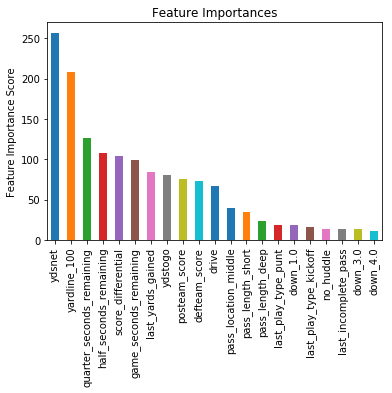

In [66]:
modelfit(xgb1, df, features, target, RandomUnderSampler(random_state=42), 'log.csv')

### Parameter tuning

In [ ]:
# We can see the optimal number of estimators from the last output
# We fix that number to tune other parameters

In [67]:
best_estimators = 60

In [69]:
#Split between train and test sets
X_train, _, y_train, __ = train_test_split(df[features], df[target], test_size=0.2, random_state=42, stratify=df[target])

# Resampling
resampler = RandomUnderSampler(random_state=42)
X_s, y_s = resampler.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_s, columns=list(df[features]))
y_train = pd.Series(y_s)

In [71]:
param_test0 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
}
gsearch0 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_estimators, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test0, scoring='precision',n_jobs=-1,iid=False, cv=5, verbose=10)
gsearch0.fit(X_train.values,y_train.values)
print (gsearch0.best_params_, gsearch0.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   52.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   52.5s finished


{'max_depth': 3, 'min_child_weight': 1} 0.7232153076240783


In [72]:
best_max_depth = 3
best_min_child_weight = 1

In [74]:
param_test1 = {
 'gamma' : [i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[0, 1e-5, 1e-2, 0.1, 1, 100]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_estimators, max_depth=best_max_depth,
 min_child_weight=best_min_child_weight, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='precision',n_jobs=-1,iid=False, cv=5, verbose=10)
gsearch1.fit(X_train.values,y_train.values)
print (gsearch1.best_params_, gsearch1.best_score_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

{'colsample_bytree': 0.9, 'gamma': 0.1, 'reg_alpha': 1, 'subsample': 0.7} 0.7255129377319116


Resampling.
Using BoostARoota for feature selection.
Round:  1  iteration:  1
Round:  1  iteration:  2
Round:  1  iteration:  3
Round:  1  iteration:  4
Round:  1  iteration:  5
Round:  1  iteration:  6
Round:  1  iteration:  7
Round:  1  iteration:  8
Round:  1  iteration:  9
Round:  1  iteration:  10
Round:  2  iteration:  1
Round:  2  iteration:  2
Round:  2  iteration:  3
Round:  2  iteration:  4
Round:  2  iteration:  5
Round:  2  iteration:  6
Round:  2  iteration:  7
Round:  2  iteration:  8
Round:  2  iteration:  9
Round:  2  iteration:  10
Round:  3  iteration:  1
Round:  3  iteration:  2
Round:  3  iteration:  3
Round:  3  iteration:  4
Round:  3  iteration:  5
Round:  3  iteration:  6
Round:  3  iteration:  7
Round:  3  iteration:  8
Round:  3  iteration:  9
Round:  3  iteration:  10
Round:  4  iteration:  1
Round:  4  iteration:  2
Round:  4  iteration:  3
Round:  4  iteration:  4
Round:  4  iteration:  5
Round:  4  iteration:  6
Round:  4  iteration:  7
Round:  4  iteratio

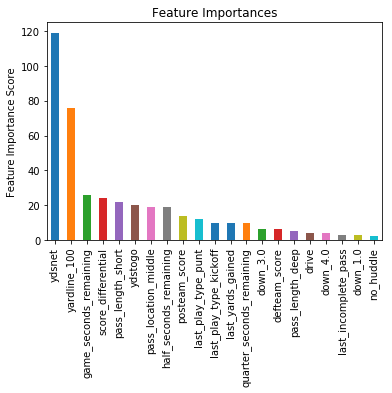

In [75]:
modelfit(gsearch1.best_estimator_, df, features, target, RandomUnderSampler(random_state=42), 'log.csv')